In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras

In [2]:
builder = tfds.builder('mnist_corrupted')
info = builder.info
print(info)

tfds.core.DatasetInfo(
    name='mnist_corrupted',
    version=1.0.0,
    description='MNISTCorrupted is a dataset generated by adding 15 corruptions to the test
images in the MNIST dataset. This dataset wraps the static, corrupted MNIST
test images uploaded by the original authors',
    homepage='https://github.com/google-research/mnist-c',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{mu2019mnist,
      title={MNIST-C: A Robustness Benchmark for Computer Vision},
      author={Mu, Norman and Gilmer, Justin},
      journal={arXiv preprint arXiv:1906.02337},
      year={2019}
    }""",
    redistribution_info=,
)



In [3]:
ds_train = tfds.load('mnist_corrupted', split="train")
ds_test = tfds.load('mnist_corrupted', split="test")


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/mnist_corrupted/identity/1.0.0.incomplete5861E7/mnist_corrupted-train.tfrecord


  0%|          | 0/60000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/mnist_corrupted/identity/1.0.0.incomplete5861E7/mnist_corrupted-test.tfrecord


  0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset mnist_corrupted downloaded and prepared to /root/tensorflow_datasets/mnist_corrupted/identity/1.0.0. Subsequent calls will reuse this data.


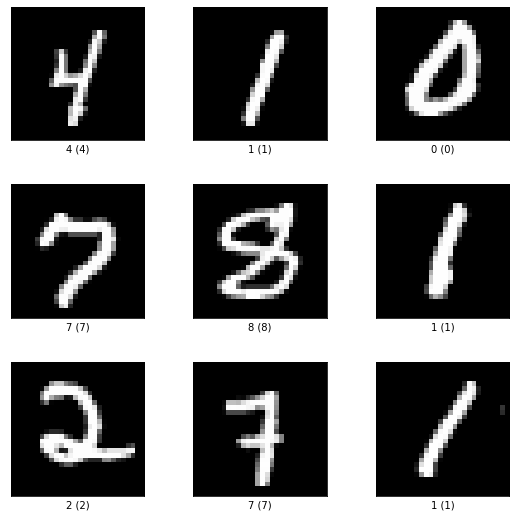

In [4]:
fig = tfds.show_examples(ds_train, info)

In [5]:
train_images = np.array([example['image'].numpy()[:,:] for example in ds_train])
train_labels = np.array([example['label'].numpy() for example in ds_train]) #0 for single color#

test_images = np.array([example['image'].numpy()[:,:] for example in ds_test])
test_labels = np.array([example['label'].numpy() for example in ds_test])

In [6]:
type(test_images[0])
train_images.shape

(60000, 28, 28, 1)

In [7]:
train_images = train_images.reshape(60000, 28, 28, 1) #1 for telling Keras library it's greyScale
test_images = test_images.reshape(10000, 28, 28, 1)

train_images = train_images.astype('float32') #instead of 'uint8' which is the default to be able to convert values => 0 to 1 instead of from 0 to 255
test_images = test_images.astype('float32')

train_images /= 255  #to make all values between 0 and 1 bec the maximum value in RGB = 255
test_images /= 255 

In [8]:
train_images[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [10]:
model = keras.Sequential([
    keras.layers.Conv2D(64, 5, strides=(1,1), input_shape = (28, 28, 1), activation = 'relu'),
    keras.layers.AveragePooling2D(2, strides =(2,2),),
    keras.layers.Conv2D(64, 5, activation = 'relu'),
    keras.layers.AveragePooling2D(2, strides =(2,2)),
    keras.layers.Conv2D(32, 2, activation = 'relu'),
    keras.layers.AveragePooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])
model.compile(optimizer = 'adam',
              loss = keras.losses.SparseCategoricalCrossentropy(),
              metrics =['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3023 - accuracy: 0.9057
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0950 - accuracy: 0.9712
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0684 - accuracy: 0.9798
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0538 - accuracy: 0.9837
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0445 - accuracy: 0.9865


In [11]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0374 - accuracy: 0.9880


[0.0374106839299202, 0.9879999756813049]